In [1]:
from global_variable import *

In [2]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np

In [3]:
# with open('sensorposition.txt', 'r') as f:
#     sensor = ast.literal_eval(f.read())


this class is created to position the sensors randomly in the range of 0-500

In [4]:
class SensorNode():
    posX=0
    posY=0
    data_rate=data_rate
    transmission_range=transmission_range

    def __init__(self):
        self.posX
        self.posY
        self.data_rate
        self.transmission_range
    
    def get_pose_node(self):
        self.posX=random.randrange(500)
        self.posY=random.randrange(500)
        self.data_rate
        self.transmission_range
        return self.posX,self.posY

a list of sensor is created in which sensor position objects are stored

In [5]:
sensor=[]

objject of class SensorNode is created and stored below

In [6]:
for i in range(number_of_sensor):
    sensor.append(SensorNode().get_pose_node())

In [7]:
sensor=sorted(sensor)

This function calulate the possible drone positions (pdp) in the grid which is of size 500x500

In [8]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions

In [9]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

Here we are creating a trip  graph between possible drone positions (pdp)

In [10]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

In [11]:
def create_trip_graph():
    G=nx.Graph()
    for i in range(len(pdp_positions)):
        G.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(pdp_positions)):
            wt=distance(pdp_positions,u,v)
            G.add_edge('pdp{}'.format(u),'pdp{}'.format(v),weight=wt)
    return G

In [12]:
trip_graph=create_trip_graph()

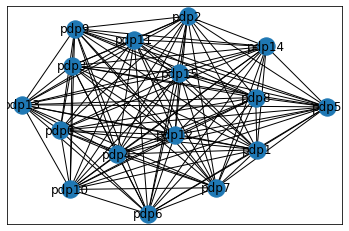

In [13]:
nx.draw_networkx(trip_graph)

A scatter plot just to see the positions of pdp and sensors

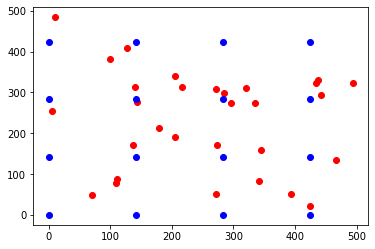

In [14]:
for i in range(len(sensor)):
    plt.scatter(sensor[i][0],sensor[i][1],c='r')
for j in range(len(pdp_positions)):
    plt.scatter(pdp_positions[j][0],pdp_positions[j][1],c='b')

A directed graph is created from networkx library

In [15]:
K=nx.DiGraph()

sensor nodes are placed in the graph

In [16]:
for i in range(len(sensor)):
    K.add_node('sensor{}'.format(i),pos=sensor[i])

here the euclidean distance between each sensor is calculated and edge is assigned between each sensor 
.Also the edge weight is assigned to 1 if the euclidean distance is less than the transmission range 

In [17]:
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                M.add_edge("sensor{}".format(i),"sensor{}".format(j))
                if euclidean_distance<=transmission_range:
                    
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1
                    
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance),(edge_weight)
                else:
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=100
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance)
            k=k+1
    return distance_sensors,M

In [18]:
euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

In [19]:
euclidean_distance_between_sensor

{1: (((5, 254), (11, 484)), 230.07824755939012),
 2: (((5, 254), (70, 49)), 215.05813167606567),
 3: (((5, 254), (99, 381)), 158.00316452527144),
 4: (((5, 254), (109, 78)), 204.4309174268902),
 5: (((5, 254), (111, 88)), 196.95684806576287),
 6: (((5, 254), (127, 409)), 197.25364381932212),
 7: (((5, 254), (137, 172)), 155.3962676514465),
 8: (((5, 254), (141, 314)), 148.64723340849636),
 9: (((5, 254), (144, 277)), 140.8900280360537),
 10: (((5, 254), (179, 214)), 178.53851125177448),
 11: (((5, 254), (205, 340)), 217.70622407271685),
 12: (((5, 254), (206, 192)), 210.34495477667156),
 13: (((5, 254), (216, 314)), 219.36499264923745),
 14: (((5, 254), (272, 50)), 336.0133925902359),
 15: (((5, 254), (272, 308)), 272.40594707164524),
 16: (((5, 254), (273, 172)), 280.26416110519733),
 17: (((5, 254), (285, 298)), 283.43605980891),
 18: (((5, 254), (296, 275)), 291.756747993941),
 19: (((5, 254), (321, 311)), 321.0996729988992),
 20: (((5, 254), (335, 273)), 330.5465171500072),
 21: ((

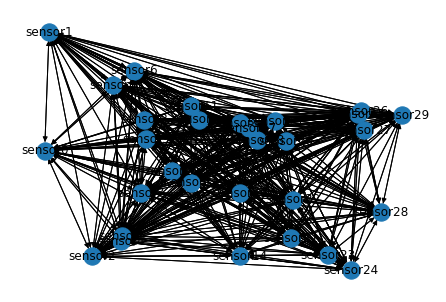

In [20]:
nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

function to calculate euclidean distance between sensor and pdps

In [21]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)

function to check euclidean distance between sensor node and pdp nodes.After that edge weight is assigned.
Also the edge is added between each pdp node  to all the sensor nodes.So this function can be also known as connectivity graph between sensor node and pdps

In [22]:
def connectivity_graph(pdp_positions,sensor,K):
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for i in range(len(pdp_positions)):
        J.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            J.add_edge("pdp{}".format(u),"sensor{}".format(v))
            
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                #J.add_edge("pdp{}".format(u),"sensor{}".format(v))
               
                
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor),(weight)
            else:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=100
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor)
            k=k+1
    return distance_pdp_each_sensor,J

In [23]:
distance_between_pdp_to_each_sensor,N=connectivity_graph(pdp_positions,sensor,L)

In [24]:
distance_between_pdp_to_each_sensor

{0: (((0.0, 0.0), (5, 254)), 254.04920783186867),
 1: (((0.0, 0.0), (11, 484)), 484.1249838626385),
 2: (((0.0, 0.0), (70, 49)), 85.44588931013593, 1),
 3: (((0.0, 0.0), (99, 381)), 393.6521306940939),
 4: (((0.0, 0.0), (109, 78)), 134.03357788255897),
 5: (((0.0, 0.0), (111, 88)), 141.65097952361643),
 6: (((0.0, 0.0), (127, 409)), 428.2639373096922),
 7: (((0.0, 0.0), (137, 172)), 219.89315587348324),
 8: (((0.0, 0.0), (141, 314)), 344.2048808486016),
 9: (((0.0, 0.0), (144, 277)), 312.1938500355188),
 10: (((0.0, 0.0), (179, 214)), 278.9928314491252),
 11: (((0.0, 0.0), (205, 340)), 397.0201506221063),
 12: (((0.0, 0.0), (206, 192)), 281.60255680657446),
 13: (((0.0, 0.0), (216, 314)), 381.11940386183437),
 14: (((0.0, 0.0), (272, 50)), 276.55740814521675),
 15: (((0.0, 0.0), (272, 308)), 410.9111826173632),
 16: (((0.0, 0.0), (273, 172)), 322.66546143025596),
 17: (((0.0, 0.0), (285, 298)), 412.34572872772674),
 18: (((0.0, 0.0), (296, 275)), 404.0309394093477),
 19: (((0.0, 0.0), 

In [25]:
colormap=[]
for i,j in N.nodes.data():
    for m,n in j.items():
        if n in sensor:
            colormap.append('b')
        else:
            colormap.append('r')

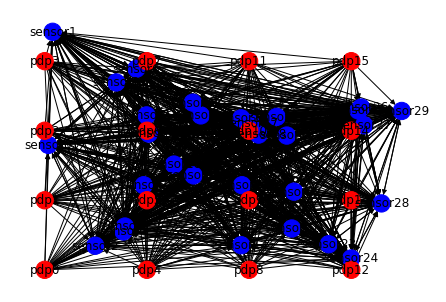

In [26]:
nx.draw(N,nx.get_node_attributes(N, 'pos'),with_labels=True,node_color=colormap)


Here the shortest path between each pdp to each sensor node is calculated.Also the path weight is assigned too.

In [27]:
k=0
arc_length={}
shortest_path={}
y={}
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        if N.has_edge('pdp{}'.format(i),'sensor{}'.format(j)):
            shortest_path[k]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),weight='weight',method='dijkstra')
            arc_length[k]=nx.dijkstra_path_length(N,'pdp{}'.format(i),'sensor{}'.format(j))
            y[i]=arc_length[k] 
           
        else:
            shortest_path[k]=0
        k=k+1

In [28]:
shortest_path[1]

['pdp0', 'sensor1']

In [29]:
arc_length

{0: 100,
 1: 100,
 2: 1,
 3: 7,
 4: 2,
 5: 2,
 6: 7,
 7: 3,
 8: 6,
 9: 5,
 10: 4,
 11: 6,
 12: 4,
 13: 6,
 14: 8,
 15: 7,
 16: 5,
 17: 7,
 18: 7,
 19: 8,
 20: 8,
 21: 7,
 22: 6,
 23: 8,
 24: 9,
 25: 100,
 26: 100,
 27: 100,
 28: 100,
 29: 100,
 30: 100,
 31: 100,
 32: 100,
 33: 100,
 34: 100,
 35: 100,
 36: 100,
 37: 100,
 38: 100,
 39: 100,
 40: 100,
 41: 100,
 42: 100,
 43: 100,
 44: 100,
 45: 100,
 46: 100,
 47: 100,
 48: 100,
 49: 100,
 50: 100,
 51: 100,
 52: 100,
 53: 100,
 54: 100,
 55: 100,
 56: 100,
 57: 100,
 58: 100,
 59: 100,
 60: 1,
 61: 100,
 62: 100,
 63: 100,
 64: 100,
 65: 100,
 66: 100,
 67: 100,
 68: 100,
 69: 100,
 70: 100,
 71: 100,
 72: 100,
 73: 100,
 74: 100,
 75: 100,
 76: 100,
 77: 100,
 78: 100,
 79: 100,
 80: 100,
 81: 100,
 82: 100,
 83: 100,
 84: 100,
 85: 100,
 86: 100,
 87: 100,
 88: 100,
 89: 100,
 90: 100,
 91: 1,
 92: 100,
 93: 100,
 94: 100,
 95: 100,
 96: 100,
 97: 100,
 98: 100,
 99: 100,
 100: 100,
 101: 100,
 102: 100,
 103: 100,
 104: 100,
 105:

In [30]:
list1=[value for value in shortest_path.values()]

In [31]:
list1

[['pdp0', 'sensor0'],
 ['pdp0', 'sensor1'],
 ['pdp0', 'sensor2'],
 ['pdp0',
  'sensor2',
  'sensor4',
  'sensor7',
  'sensor10',
  'sensor9',
  'sensor8',
  'sensor3'],
 ['pdp0', 'sensor2', 'sensor4'],
 ['pdp0', 'sensor2', 'sensor5'],
 ['pdp0',
  'sensor2',
  'sensor4',
  'sensor7',
  'sensor10',
  'sensor9',
  'sensor8',
  'sensor6'],
 ['pdp0', 'sensor2', 'sensor4', 'sensor7'],
 ['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10', 'sensor9', 'sensor8'],
 ['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10', 'sensor9'],
 ['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10'],
 ['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10', 'sensor9', 'sensor11'],
 ['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor12'],
 ['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10', 'sensor9', 'sensor13'],
 ['pdp0',
  'sensor2',
  'sensor4',
  'sensor7',
  'sensor12',
  'sensor16',
  'sensor22',
  'sensor21',
  'sensor14'],
 ['pdp0',
  'sensor2',
  'sensor4',
  'sensor7',
  'sensor10',
  'sensor9',
  'sens

to assign the path lenght to the shortest path between pdp to sensor so the values are zipped below

In [32]:
zipped=zip(list1,arc_length.values())

In [33]:
type(zipped)

zip

In [34]:
new_list=list(zipped)

In [35]:
new_list

[(['pdp0', 'sensor0'], 100),
 (['pdp0', 'sensor1'], 100),
 (['pdp0', 'sensor2'], 1),
 (['pdp0',
   'sensor2',
   'sensor4',
   'sensor7',
   'sensor10',
   'sensor9',
   'sensor8',
   'sensor3'],
  7),
 (['pdp0', 'sensor2', 'sensor4'], 2),
 (['pdp0', 'sensor2', 'sensor5'], 2),
 (['pdp0',
   'sensor2',
   'sensor4',
   'sensor7',
   'sensor10',
   'sensor9',
   'sensor8',
   'sensor6'],
  7),
 (['pdp0', 'sensor2', 'sensor4', 'sensor7'], 3),
 (['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10', 'sensor9', 'sensor8'],
  6),
 (['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10', 'sensor9'], 5),
 (['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10'], 4),
 (['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10', 'sensor9', 'sensor11'],
  6),
 (['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor12'], 4),
 (['pdp0', 'sensor2', 'sensor4', 'sensor7', 'sensor10', 'sensor9', 'sensor13'],
  6),
 (['pdp0',
   'sensor2',
   'sensor4',
   'sensor7',
   'sensor12',
   'sensor16',
   'sensor22',
   'sen

Here to calculate the weight for each pdp we need to group the path length of the shortest distance between the pdp 
and sensor which is also known as hop.
Since dijkstra algorithm is giving the shortest length with path length having weights =100 so we are replacing them with 0

In [36]:
from collections import defaultdict

values=defaultdict(list)
for j in range(len(pdp_positions)):
    for k,v in new_list:
        if k[0]=='pdp{}'.format(j):
            if v!=100:
                values[j].append(v)
            else:
                values[j].append(0)
                
            


In [37]:
values=dict(values)

In [38]:
values

{0: [0,
  0,
  1,
  7,
  2,
  2,
  7,
  3,
  6,
  5,
  4,
  6,
  4,
  6,
  8,
  7,
  5,
  7,
  7,
  8,
  8,
  7,
  6,
  8,
  9,
  0,
  0,
  0,
  0,
  0],
 1: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 2: [1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 3: [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 4: [0,
  0,
  1,
  6,
  1,
  1,
  6,
  2,
  5,
  4,
  3,
  5,
  3,
  5,
  7,
  6,
  4,
  6,
  6,
  7,
  7,
  6,
  5,
  7,
  8,
  0,
  0,
  0,
  0,
  0],
 5: [0,
  0,
  2,
  4,
  1,
  1,
  4,
  1,
  3,
  2,
  1,
  3,
  1,
  3,
  5,
  4,
  2,
  4,
  4,
  5,
  5,
  4,
  3,
  5,
  6,
  0,
  0,
  0,
  0,
  0],
 6: [0,
  0,
  4,
  2,
  3,
  3,
  2,
  2,
  1,
  1,
  1,
  1,
  2,
  1,
  6

here we are counting the unique values in the list 

In [39]:
values1={}
counts={}
for keys,val in values.items():
    values1[keys],counts[keys]=np.unique(val, return_counts=True)

In [40]:
values1

{0: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 1: array([0]),
 2: array([0, 1]),
 3: array([0, 1]),
 4: array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 5: array([0, 1, 2, 3, 4, 5, 6]),
 6: array([0, 1, 2, 3, 4, 5, 6, 7]),
 7: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 8: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 9: array([0, 1, 2, 3, 4, 5, 6]),
 10: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 11: array([0]),
 12: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 13: array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 14: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 15: array([0, 1, 2])}

In [41]:
counts

{0: array([7, 1, 2, 1, 2, 2, 4, 6, 4, 1], dtype=int64),
 1: array([30], dtype=int64),
 2: array([29,  1], dtype=int64),
 3: array([29,  1], dtype=int64),
 4: array([7, 3, 1, 2, 2, 4, 6, 4, 1], dtype=int64),
 5: array([7, 5, 3, 4, 6, 4, 1], dtype=int64),
 6: array([7, 5, 7, 5, 2, 1, 2, 1], dtype=int64),
 7: array([7, 2, 1, 3, 4, 4, 3, 2, 1, 2, 1], dtype=int64),
 8: array([7, 1, 1, 2, 2, 1, 2, 3, 4, 5, 2], dtype=int64),
 9: array([7, 5, 3, 4, 4, 5, 2], dtype=int64),
 10: array([7, 7, 2, 3, 2, 3, 2, 1, 2, 1], dtype=int64),
 11: array([30], dtype=int64),
 12: array([7, 2, 1, 2, 1, 1, 2, 3, 4, 5, 2], dtype=int64),
 13: array([6, 3, 3, 2, 2, 3, 4, 5, 2], dtype=int64),
 14: array([3, 5, 4, 2, 2, 3, 2, 3, 2, 1, 2, 1], dtype=int64),
 15: array([26,  1,  3], dtype=int64)}

In [42]:
def calculate_weight(values,hops):
    weight_of_pdp={}
    for i in range(len(values)):
        weight=0
        for j in range(len(values[i])):
            if values[i][j]!=0:
                print(values[i][j])
                print(hops[i][j])
                print('***')
                weight=weight+hops[i][j]/values[i][j]
        weight_of_pdp[i]=weight
    return weight_of_pdp

In [43]:
weight=calculate_weight(values1,counts)

1
1
***
2
2
***
3
1
***
4
2
***
5
2
***
6
4
***
7
6
***
8
4
***
9
1
***
1
1
***
1
1
***
1
3
***
2
1
***
3
2
***
4
2
***
5
4
***
6
6
***
7
4
***
8
1
***
1
5
***
2
3
***
3
4
***
4
6
***
5
4
***
6
1
***
1
5
***
2
7
***
3
5
***
4
2
***
5
1
***
6
2
***
7
1
***
1
2
***
2
1
***
3
3
***
4
4
***
5
4
***
6
3
***
7
2
***
8
1
***
9
2
***
10
1
***
1
1
***
2
1
***
3
2
***
4
2
***
5
1
***
6
2
***
7
3
***
8
4
***
9
5
***
10
2
***
1
5
***
2
3
***
3
4
***
4
4
***
5
5
***
6
2
***
1
7
***
2
2
***
3
3
***
4
2
***
5
3
***
6
2
***
7
1
***
8
2
***
9
1
***
1
2
***
2
1
***
3
2
***
4
1
***
5
1
***
6
2
***
7
3
***
8
4
***
9
5
***
10
2
***
1
3
***
2
3
***
3
2
***
4
2
***
5
3
***
6
4
***
7
5
***
8
2
***
1
5
***
2
4
***
3
2
***
4
2
***
5
3
***
6
2
***
7
3
***
8
2
***
9
1
***
10
2
***
11
1
***
1
1
***
2
3
***


In [44]:
weight

{0: 5.368253968253968,
 1: 0,
 2: 1.0,
 3: 1.0,
 4: 7.163095238095238,
 5: 10.299999999999999,
 6: 11.342857142857142,
 7: 6.532936507936507,
 8: 4.884126984126984,
 9: 10.166666666666666,
 10: 10.937301587301587,
 11: 0,
 12: 5.6341269841269845,
 13: 7.897619047619048,
 14: 10.180591630591632,
 15: 2.5}